# Resolução do problema de condução de calor

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Função para plotar os curvas de nível constante de temperatura
def PlotaTemperature(n,m,T):
    x = np.arange(0, n, 1)
    y = np.arange(0, m, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(T)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of temperature')
    im = ax.contourf(X, Y, Z.T, 20, cmap='jet')
    im2 = ax.contour(X, Y, Z.T, 20, linewidths=0.25, colors='k')
    fig.colorbar(im, ax=ax)
    plt.show()

## Método de Jacobi

Converged in 1487 iterations



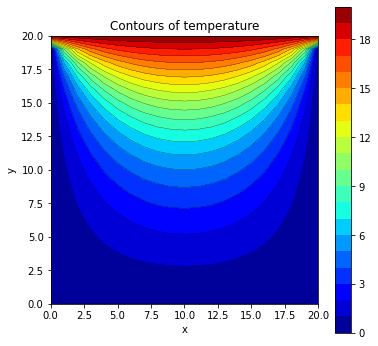

In [3]:
# Numero de pontos em cada direcao
N = 11

Told = np.zeros(shape=(N,N))

# Temperaturas nas bordas
Told[0,  :] = 0.0 # TL
Told[N-1,:] = 0.0 # TR
Told[:,  0] = 0.0 # TB
Told[:,N-1] = 20.0 # TT

# Loop de iteracoes
Nmax = 10000
Tnew = Told.copy()
for iter in range(Nmax):
    Tnew[1:N-1,1:N-1] = 0.25*(Told[2:N,1:N-1] + Told[0:N-2,1:N-1] + \
                              Told[1:N-1,2:N] + Told[1:N-1,0:N-2])
    
    error = np.linalg.norm(Tnew-Told)
    #print(iter, '  ', error)
    if(error < 1.0e-8):
        print('Converged in %d iterations\n' %(iter))
        break ;
        
    Told = Tnew.copy()
    
PlotaTemperature(N,N,Tnew)

## Método de Gauss-Seidel

In [4]:
# Numero de pontos em cada direcao
N = 11 

Told = np.zeros(shape=(N,N))

# Temperaturas nas bordas
Told[0,  :] = 0.0 # TL
Told[N-1,:] = 0.0 # TR
Told[:,  0] = 0.0 # TB
Told[:,N-1] = 20.0 # TT

# Loop de iteracoes
Nmax = 10000
Tnew = Told.copy()
for iter in range(Nmax):
    for i in range(1,N-1):
        for j in range(1,N-1):
            Tnew[i,j] = 0.25*(Told[i+1,j] + Tnew[i-1,j] +\
                              Told[i,j+1] + Tnew[i,j-1])
    
    error = np.linalg.norm(Tnew-Told)
    #print(iter, '  ', error)
    if(error < 1.0e-8):
        print('Converged in %d iterations\n' %(iter))
        break ;
        
    Told = Tnew.copy()

Converged in 200 iterations

